# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

DATA

In [44]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

EDA

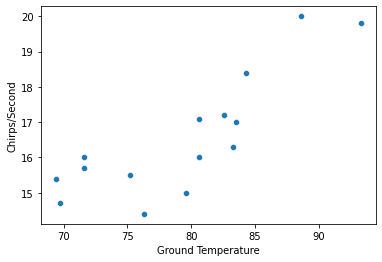

In [45]:
sns.scatterplot(x = df['Ground Temperature'],y = df['Chirps/Second'])

Linear Relation can be deduced from the graph.

In [46]:
df[['Ground Temperature','Chirps/Second']].corr()

,Ground Temperature,Chirps/Second
Ground Temperature,1.000000,0.832042
Chirps/Second,0.832042,1.000000


As correlation is >.2, hence, there is a strong Correlation.

In [47]:
X = df['Ground Temperature'].values.reshape(-1,1)
y = df['Chirps/Second'].values

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=.2,random_state=2)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

1. Linear Regression Equation

In [49]:
print('Linear Regression Equation: y = {0}x + {1}'.format(model.coef_,model.intercept_))

Linear Regression Equation: y = [0.20119124]x + 0.6005148917491159


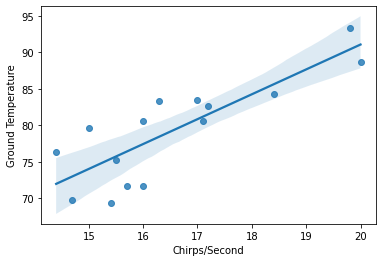

In [50]:
sns.regplot(df['Chirps/Second'],df['Ground Temperature'])

2. Charting the data and the equation

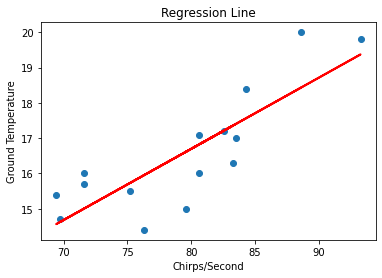

In [51]:
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

3. Score

In [52]:
from sklearn import metrics

print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

   Actual  Predicted
0    17.2  17.218911
1    17.1  16.816529
2    15.5  15.730096
R2- SCORE: 0.9265616592526871 --------> 92.65616592526871 %


In [53]:
res = model.predict([[95]])
print('If the ground temperature reached 95,\nthen approximate rate for the crickets to be chirping is ',res,'chirps/second')

If the ground temperature reached 95,
then approximate rate for the crickets to be chirping is  [19.7136826] chirps/second


INTERPOLATING DATA:

In [54]:
y = df['Ground Temperature'].values
X = df['Chirps/Second'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=.2,random_state=2)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

   Actual  Predicted
0    82.6  81.489688
1    80.6  81.151035
2    75.2  75.732593
R2- SCORE: 0.9378950715686918 --------> 93.78950715686918 %


In [55]:
res = model.predict([[18]])
print('the crickets were chirping at a rate of 18 chirps per second\n then approximate ground temperature that morning would be', res,'degree celsius')

the crickets were chirping at a rate of 18 chirps per second
 then approximate ground temperature that morning would be [84.19890868] degree celsius


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [56]:
df = pd.read_fwf("https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/brain_body.txt")

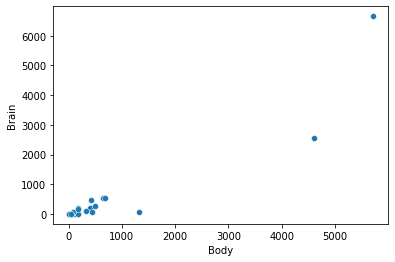

In [57]:
sns.scatterplot(x=df.Body,y=df.Brain)

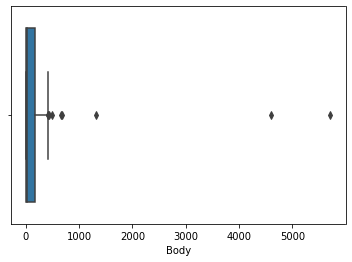

In [58]:
sns.boxplot(df.Body)

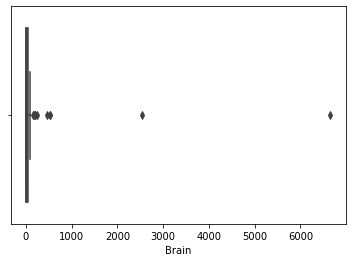

In [59]:
sns.boxplot(x=df.Brain)

In [60]:
# df.drop(df[df.Body>2000].index,inplace=True)
# df.drop(df[df.Brain>2000].index,inplace=True)
# sns.boxplot(x=df.Body)
# plt.show()
# sns.boxplot(x=df.Brain)
# plt.show()

In [61]:
df[['Brain','Body']].corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [62]:
X = df.Body.values.reshape(-1,1)
y = df.Brain.values

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=40)

In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [65]:
print('Equation of Line:  y =', model.coef_,'x + ', model.intercept_)

Equation of Line:  y = [0.90517321] x +  -60.72105911722721


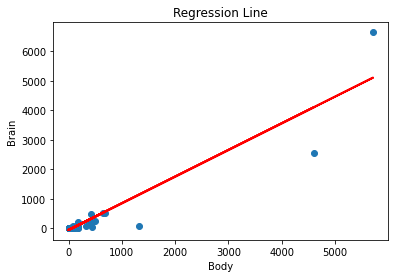

In [66]:
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

In [67]:
from sklearn import metrics 
y_pred=model.predict(X_test)
val = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(val.head())
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

   Actual   Predicted
0    0.20  -56.195193
1    3.60  -41.712422
2  521.00  532.167392
3   36.33   47.447139
4    1.41  -44.880528
R2- SCORE: 0.8497138364607028 --------> 84.97138364607028 %


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [68]:
import pandas as pd
import numpy as np

In [69]:
df = pd.read_fwf('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/salary.txt', header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [70]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [71]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [72]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [73]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [74]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


As we can see the correlation between all individual features and Salary is >.2 or <-.2 which means they have strong correlation except for Degree.
Hence, Degree and Salary are not linearly correlated.

In [75]:
X = df[['Sex','Rank','Year','YSdeg']].values
y = df['Salary'].values

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=38)

In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [78]:
model.coef_, model.intercept_

(array([1055.86510199, 5120.51643955,  412.3424288 ,  -66.92556781]),
 11036.227374638598)

In [79]:
from sklearn import metrics
y_pred = model.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

R2- SCORE: 0.9650497181161739 --------> 96.5049718116174 %


With this we can conclude that all the features together can be used for precting target variable.

PREDICTION USING INDIVIDUAL FEATURE 

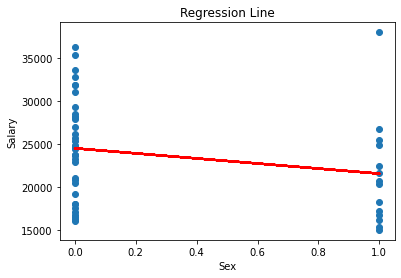

R2- SCORE: 0.06687211053485076 --------> 6.6872110534850755 %


In [80]:
X = df[['Sex']].values
y = df['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=38)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
from sklearn import metrics
y_pred = model.predict(X_test)
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

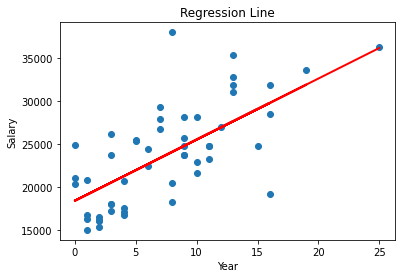

R2- SCORE: 0.7137625293007956 --------> 71.37625293007956 %


In [81]:
X = df[['Year']].values
y = df['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=38)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
from sklearn import metrics
y_pred = model.predict(X_test)
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

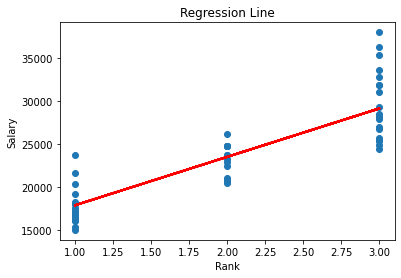

R2- SCORE: 0.8096860595388825 --------> 80.96860595388826 %


In [82]:
X = df[['Rank']].values
y = df['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=38)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
from sklearn import metrics
y_pred = model.predict(X_test)
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

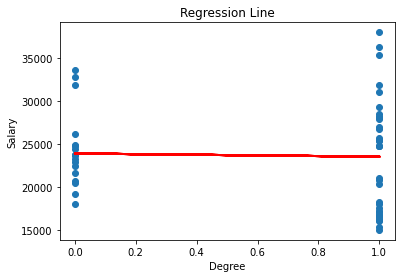

R2- SCORE: -0.0005782266184279905 --------> -0.05782266184279905 %


In [83]:
X = df[['Degree']].values
y = df['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
from sklearn import metrics
y_pred = model.predict(X_test)
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

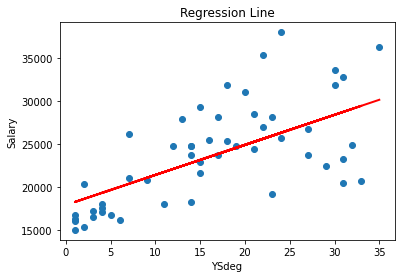

R2- SCORE: 0.6658193092973932 --------> 66.58193092973931 %


In [84]:
X = df[['YSdeg']].values
y = df['Salary'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=38)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
from sklearn import metrics
y_pred = model.predict(X_test)
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
print('R2- SCORE:', metrics.r2_score(y_test,y_pred),'-------->',metrics.r2_score(y_test,y_pred)*100,'%')

###CONCLUSION
Except Degree with almost no relation with Salary, we can say except degree, all other features can be used for predicting Salary.